## Lecture 4 Pandas

### Table of contents

1. [Pandas](#pandas)

In [2]:
import sys
import pandas as pd
import numpy as np

In [5]:
print(f'Python version {sys.version}')
print(f'Pandas version {pd.__version__}')

Python version 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
Pandas version 2.2.1


## Data structures in pandas

### Series
* 1D labeled array able to hold any data type (int,str,float, Python objects, etc.)

In [9]:
pd.Series([1,-1,1,-1]).index

RangeIndex(start=0, stop=4, step=1)

`data` (in the example above) can be:
    * a dict
    * a list
    * an ndarray
    * a scalar value


Examples of from dict and a scalar value below:

In [10]:
# in case of dictionary
pd.Series({'aa':1, 'aaa':'b', 'aaaa':'g'})

aa      1
aaa     b
aaaa    g
dtype: object

In [14]:
pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])

a    0
b    1
c    2
d    3
e    4
dtype: int32

* a key difference between Series/pandas and ndarray: operations between Series automatically align the data based on label

In [15]:
a = pd.Series({'Vítek':5, 'Martin':10, 'Honza':0})
b = pd.Series({'Martin':20,'Honza':15,'Vítek':5})
print(f'A:\n{a}\nB:\n{b}')
a + b

A:
Vítek      5
Martin    10
Honza      0
dtype: int64
B:
Martin    20
Honza     15
Vítek      5
dtype: int64


Honza     15
Martin    30
Vítek     10
dtype: int64

In [16]:
a = [5,10,0]
b = [20,15,5]

np.array(a) + np.array(b) # now works as expected

array([25, 25,  5])

* looping through (value-by-value) usually not necessary, remember the case of np array

###  DataFrame

* a 2D labeled data structure with columns of potentially different types
* like a spreadsheet or SQL table, or a dict of Series objects
* the most frequently used pandas object 
* can be created:
    * typically by reading a csv file
    * dict of 1D ndarrays, lists, dicts, Series
    * 2D numpy.ndarray
    * a Series
    * another DataFrame

In [17]:
pd.DataFrame({'var':[1,2,3], 'column2':[0,0,0]})

,var,column2
0,1,0
1,2,0
2,3,0


In [18]:
pd.DataFrame([{'var':1,'column2':0},{'var':2,'column2':0},{'var':3,'column2':0}])

,var,column2
0,1,0
1,2,0
2,3,0


In [19]:
# from dict of Series
d = {'one': pd.Series([1., 2., 3.],     index=['a', 'e', 'c']),
     'two': pd.Series([2., 1., 3., 4.], index=['b', 'a', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,NaN,2.0
c,3.0,3.0
d,NaN,4.0
e,2.0,NaN


Now that we have our data unzipped, we can load them into Python, specifically using Pandas tools.

### Data I/O (in/out)
* CSV, JSON, HTML, Excel, HDF5, SQL, pickle, ...
    * for specific details, see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)
* `pd.read_csv()` is the workhorse for reading text files
    * large number of params means great flexibility when getting data in
    
We will work with the course evaluation data from FSV.
  * each observation is a response to the following questionare (... hope it reminds you of something)

In [28]:
# load the "raw" data for one particular year
df = pd.read_csv('auxiliary/data_2017_zs.csv', sep = ';', on_bad_lines= 'skip')
df.head(20)

,cislo_dot,kod_predm,nazev_predm,prednasejici,cvicici,q1,q2,q3,q4,q5,...,q7,q8,q9,q10,q11,q12,q13,t1,t2,katedra_code
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
1,2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,...,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
4,5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,...,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies
5,6,JPM314,Theories of International Relations,"Ditrych,O.,Plechanovová,B.",NaN,2.0,3.0,2.0,4.0,1.0,...,NaN,NaN,2.0,3.0,1.0,3.0,1.0,NaN,NaN,kmv
6,7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,...,NaN,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies
7,8,JEB058,Seminář matematické analýzy I,NaN,"Stráský,J.",4.0,4.0,NaN,NaN,NaN,...,5.0,5.0,1.0,1.0,2.0,3.0,5.0,NaN,NaN,ies
8,9,JPM561,Regional Security Studies,"Karásek,T.,Klosek,K.","Karásek,T.,Klosek,K.",5.0,3.0,5.0,5.0,4.0,...,5.0,4.0,1.0,5.0,4.0,5.0,5.0,NaN,NaN,kbs
9,10,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,3.0,4.0,2.0,2.0,2.0,...,NaN,NaN,1.0,3.0,3.0,3.0,1.0,NaN,NaN,ies


In [42]:
# raw data have column names in czech, let's rename them
# if you do not want to reassign, you can provide arg. "inplace = True"
df = df.rename(columns = {
    'cislo_dot' : 'number',
    'kod_predm' : 'course_code',
    'nazev_predm' : 'course_title',
    'prednasejici' : 'teachers',
    'cvicici' : 'seminar_leaders',
    't1': 'c_value',
    't2': 'c_improve', 
    'katedra_code' : 'department_code'
})
df.head(10)

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10,8.0
1,2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,...,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,11/10,8.0
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,8.0
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10,7.0
4,5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,...,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,5.0
5,6,JPM314,Theories of International Relations,"Ditrych,O.,Plechanovová,B.",NaN,2.0,3.0,2.0,4.0,1.0,...,2.0,3.0,1.0,3.0,1.0,NaN,NaN,kmv,11/10,5.0
6,7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,...,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,11/10,7.0
7,8,JEB058,Seminář matematické analýzy I,NaN,"Stráský,J.",4.0,4.0,NaN,NaN,NaN,...,1.0,1.0,2.0,3.0,5.0,NaN,NaN,ies,11/10,8.0
8,9,JPM561,Regional Security Studies,"Karásek,T.,Klosek,K.","Karásek,T.,Klosek,K.",5.0,3.0,5.0,5.0,4.0,...,1.0,5.0,4.0,5.0,5.0,NaN,NaN,kbs,11/10,8.0
9,10,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,3.0,4.0,2.0,2.0,2.0,...,1.0,3.0,3.0,3.0,1.0,NaN,NaN,ies,11/10,7.0


In [22]:
# iterative
df.index

RangeIndex(start=0, stop=6995, step=1)

In [23]:
# set column named "course_code" to be an index (or you can use "inplace" option again)
df.set_index('number', inplace = True)

In [22]:
df

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
number,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,JJM260,Novinářská etika v praxi,"Moravec,V.",NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,1.0,5.0,4.0,5.0,5.0,"Tlak ze strany vyucujicicho - eseje, pestovani...",Vetsi ucebnu?,kz
6994,JJM264,Diplomový seminář II.,NaN,NaN,2.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,3.0,NaN,"Mel by byt oba semestry, ne pouze v zimnim, st...",kz
6995,JJM360,Ekonomika v médiích,"Klimeš,D.",NaN,5.0,4.0,5.0,5.0,4.0,NaN,NaN,NaN,2.0,5.0,3.0,5.0,5.0,Hosty a jejich prednasky.,NaN,kz


In [24]:
df.shape

(6995, 20)

In [24]:
df.course_code # it is not used mostly because a column can be called mean for example.

number
1        JEB003
2        JLB003
3       NMMA701
4        JEB023
5        JEB055
         ...   
6993     JJM260
6994     JJM264
6995     JJM360
6996     JJM354
6997     JJM340
Name: course_code, Length: 6995, dtype: object

In [25]:
# look at the data but refrain from drawing the conclusions
df.head(5)

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
number,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies


In [26]:
# make a copy of original data, so if you mess up, can go back to this
# not that smart when you are working with the large data
df_copy = df.copy(deep = True)

* `pd.DataFrame.copy()`:
    * deep: modifications to the data or indices of the copy will not be reflected in the original object
    * shallow: any changes to the data of the original will be reflected in the shallow copy (and vice versa)

In [27]:
# try to call it as a function
# df.shape() # it is an attribute not a function
df.shape

(6995, 20)

In [28]:
# classical data summarization
df.describe()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
count,6847.000000,6827.000000,5458.000000,5457.000000,5458.000000,2600.000000,2600.000000,2600.000000,6776.000000,6829.000000,6783.000000,6801.000000,6798.00000
mean,4.108661,3.284166,4.214731,4.359355,3.872664,4.288462,4.494231,4.151923,1.419126,4.020940,3.574672,3.896927,4.12739
std,1.019755,1.056333,1.032399,0.999295,1.267321,0.964880,0.887239,1.142584,0.775423,1.069084,1.274129,1.115977,1.12351
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,3.000000,4.00000
50%,4.000000,3.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000,4.000000,4.000000,5.00000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [29]:
# object means that pandas does not know the data type. Most oftten it is string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6995 entries, 0 to 6994
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cislo_dot     6995 non-null   int64  
 1   kod_predm     6995 non-null   object 
 2   nazev_predm   6995 non-null   object 
 3   prednasejici  5434 non-null   object 
 4   cvicici       2588 non-null   object 
 5   q1            6847 non-null   float64
 6   q2            6827 non-null   float64
 7   q3            5458 non-null   float64
 8   q4            5457 non-null   float64
 9   q5            5458 non-null   float64
 10  q6            2600 non-null   float64
 11  q7            2600 non-null   float64
 12  q8            2600 non-null   float64
 13  q9            6776 non-null   float64
 14  q10           6829 non-null   float64
 15  q11           6783 non-null   float64
 16  q12           6801 non-null   float64
 17  q13           6798 non-null   float64
 18  t1            2183 non-null 

In [30]:
# memory usage of each column in bytes (useful when working with the larger datasets)
df.memory_usage()

Index             132
cislo_dot       55960
kod_predm       55960
nazev_predm     55960
prednasejici    55960
cvicici         55960
q1              55960
q2              55960
q3              55960
q4              55960
q5              55960
q6              55960
q7              55960
q8              55960
q9              55960
q10             55960
q11             55960
q12             55960
q13             55960
t1              55960
t2              55960
katedra_code    55960
dtype: int64

* you can treat a DataFrame semantically like a dict of like-indexed Series objects
    * getting, setting, and deleting columns works with the same syntax as the analogous dict operations

## Indexing/Selection

| Operation                      | Syntax        |  Result   |
|--------------------------------|---------------|-----------|
| Select column                  | df[col]       |  Series   |
| Select row by label            | df.loc[label] |  Series   |
| Select row by integer location | df.iloc[loc]  |  Series   |
| Slice rows                     | df[5:10]      | DataFrame |
| Select rows by boolean vector  | df[bool_vec]  | DataFrame |

In [34]:
# gives us series
df['course_title']

0                          Ekonomie I
1            Angličtina pro ekonomy I
2                        Matematika 1
3                Úvod do studia práva
4              Seminář k aktualitám I
                    ...              
6990         Novinářská etika v praxi
6991            Diplomový seminář II.
6992              Ekonomika v médiích
6993           Dějiny populární hudby
6994    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [35]:
#this demonstrates usefullness of proper column naming
df.course_title

0                          Ekonomie I
1            Angličtina pro ekonomy I
2                        Matematika 1
3                Úvod do studia práva
4              Seminář k aktualitám I
                    ...              
6990         Novinářská etika v praxi
6991            Diplomový seminář II.
6992              Ekonomika v médiích
6993           Dějiny populární hudby
6994    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [36]:
# multple columns -> gives us dataframe
df[['course_title']]

,course_title
0,Ekonomie I
1,Angličtina pro ekonomy I
2,Matematika 1
3,Úvod do studia práva
4,Seminář k aktualitám I
...,...
6990,Novinářská etika v praxi
6991,Diplomový seminář II.
6992,Ekonomika v médiích
6993,Dějiny populární hudby


In [34]:
# just one column: just convenience (if column name has a space or dot, you are screwed)
#naming conventions: no special character, underscore for spaces, no CZECH chars! informative and short
df.course_title

number
1                          Ekonomie I
2            Angličtina pro ekonomy I
3                        Matematika 1
4                Úvod do studia práva
5              Seminář k aktualitám I
                    ...              
6993         Novinářská etika v praxi
6994            Diplomový seminář II.
6995              Ekonomika v médiích
6996           Dějiny populární hudby
6997    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [35]:
# subset of columns you want 
df[['course_title','teachers']].head(10)

,course_title,teachers
number,,
1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N."
2,Angličtina pro ekonomy I,NaN
3,Matematika 1,"Spurný,J."
4,Úvod do studia práva,"Pražák,P.,Wintr,J."
5,Seminář k aktualitám I,NaN
6,Theories of International Relations,"Ditrych,O.,Plechanovová,B."
7,Úvod do ekonomie,"Kameníček,J."
8,Seminář matematické analýzy I,NaN
9,Regional Security Studies,"Karásek,T.,Klosek,K."


In [37]:
# list of all columns 
df.columns

Index(['number', 'course_code', 'course_title', 'teachers', 'seminar_leaders',
       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 'c_value', 'c_improve', 'department_code'],
      dtype='object')

In [39]:
# adding columns (first adding, so we have something to drop)
df['tmp'] = '11/10'
# you can also use assign function, if new column should be a function of original column 
df.head()

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10
1,2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,...,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,11/10
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10
4,5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10


In [50]:
df['sumq1q2'] = df.q1+df.q2
df.head()

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10,8.0
1,2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,...,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,11/10,8.0
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,8.0
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10,7.0
4,5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,...,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,5.0


In [42]:
# drop column (you can also use 'del' (a general python comand for deleting)
df.drop('tmp', axis = 1, inplace = True) # axis to specify you want to drop column, inplace operation in this case
del a #delete variable
a

NameError: name 'a' is not defined

In [56]:
"JEB003" in df.values
(df['course_code'] == "JEB003").any()
cond = (df['course_code'] == "JEB003") & (df['q1'] == 1)
df.loc[cond]

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2


In [58]:
df[(df.department_code == 'ies') & (df.teachers.str.contains('Červinka'))]

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2
35,36,JEB105,Statistics,"Červinka,M.","Červinka,M.",4.0,5.0,5.0,4.0,3.0,...,1.0,3.0,4.0,2.0,3.0,NaN,NaN,ies,11/10,9.0
41,42,JEB105,Statistics,"Červinka,M.","Hanus,L.",5.0,5.0,5.0,5.0,5.0,...,2.0,5.0,5.0,5.0,5.0,Přístup vyučujících a pana Červinky k předmětu...,"Možná jasnější prezentace, slidy byly někdy ve...",ies,11/10,10.0
325,327,JEB105,Statistics,"Červinka,M.","Smutná,Š.",5.0,4.0,4.0,5.0,4.0,...,1.0,5.0,5.0,4.0,5.0,Jako student ekonomické teorii považuji tento ...,Když tento předmět srovnám s výukou matematiky...,ies,11/10,9.0
385,387,JEB105,Statistics,"Červinka,M.","Hanus,L.",5.0,4.0,4.0,5.0,4.0,...,1.0,5.0,4.0,4.0,4.0,Oceňuji komentáře pana Červinky k našim hodnoc...,Měl bych poznámku ohledně prezentací. U někter...,ies,11/10,9.0
880,882,JEB105,Statistics,"Červinka,M.","Nevrla,M.",5.0,4.0,5.0,5.0,3.0,...,1.0,5.0,5.0,5.0,5.0,I když jsem byla jen na první přednášce a prvn...,Možná bych ocenila více tipů na literaturu (na...,ies,11/10,9.0
941,943,JEB105,Statistics,"Červinka,M.","Červinka,M.",5.0,5.0,5.0,5.0,5.0,...,1.0,5.0,5.0,4.0,5.0,NaN,NaN,ies,11/10,10.0
1001,1003,JEB105,Statistics,"Červinka,M.","Hanus,L.",4.0,5.0,4.0,3.0,5.0,...,1.0,5.0,5.0,5.0,4.0,NaN,NaN,ies,11/10,9.0
1416,1418,JEB105,Statistics,"Červinka,M.","Nevrla,M.",4.0,5.0,4.0,5.0,5.0,...,1.0,NaN,NaN,NaN,NaN,"Domácí úkoly byly časově velice náročné, ale m...",NaN,ies,11/10,9.0
1427,1429,JEB105,Statistics,"Červinka,M.","Červinka,M.",5.0,5.0,5.0,5.0,5.0,...,1.0,5.0,5.0,5.0,5.0,NaN,NaN,ies,11/10,10.0
2193,2195,JEB105,Statistics,"Červinka,M.","Smutná,Š.",5.0,5.0,5.0,5.0,5.0,...,1.0,5.0,4.0,4.0,5.0,NaN,NaN,ies,11/10,10.0


In [59]:
df[df.department_code == 'ies']

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10,8.0
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,8.0
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10,7.0
4,5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,...,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,5.0
6,7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,...,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,11/10,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,6973,JEB105,Statistics,"Červinka,M.","Smutná,Š.",2.0,4.0,1.0,2.0,2.0,...,1.0,4.0,4.0,3.0,1.0,"Domácí úkoly, ačkoliv systém hodnocení je extr...",Přednášky. Pan Červinka se vše snaží dělat mno...,ies,11/10,6.0
6973,6976,NMMA703,Matematika 3,"Zelený,M.","Zelený,M.",5.0,5.0,5.0,5.0,5.0,...,1.0,5.0,5.0,5.0,5.0,NaN,NaN,ies,11/10,10.0
6974,6977,JEB114,Macroeconomics I,"Brož,V.,Horváth,R.,Kudashvili,N.,Mareš,J.","Brož,V.,Horváth,R.,Kudashvili,N.,Mareš,J.",1.0,1.0,1.0,1.0,1.0,...,3.0,2.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,2.0
6975,6978,JEB108,Microeconomics II,"Čechová,K.,Chytilová,J.,Jonášová,J.,Polák,P.","Chytilová,J.,Jonášová,J.,Smutná,Š.",3.0,3.0,5.0,5.0,4.0,...,1.0,2.0,1.0,3.0,3.0,NaN,NaN,ies,11/10,6.0


### loc and Idioms
* `.loc` selects data by the label of the rows and columns (as opposed to the `.iloc`) integer location
* we can also use `.loc` for subsetting based on condition(s)

In [61]:
df.loc[5:25:3,['department_code','teachers']]

,department_code,teachers
5,kmv,"Ditrych,O.,Plechanovová,B."
8,kbs,"Karásek,T.,Klosek,K."
11,kbs,"Daniel,J."
14,kmv,"Parízek,M."
17,kvsp,"Drhová,Z."
20,kbs,"Duračinská,Z.,Střítecký,V."
23,kms,"Bednařík,P.,Končelík,J."


#### Subset using a mask

In [63]:
# select only observations for IES only
df_ies = df.loc[df['department_code'] == 'ies']

In [64]:
df_ies.head()

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10,8.0
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,8.0
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10,7.0
4,5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,...,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,5.0
6,7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,...,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,11/10,7.0


In [65]:
# select only observations for Advanced Econometrics
df.loc[df['course_title'] == 'Advanced Econometrics'].head(2)

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2
88,89,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",5.0,5.0,5.0,5.0,4.0,...,1.0,5.0,5.0,5.0,1.0,Mr.Barunik is very sexy,NaN,ies,11/10,10.0
971,973,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",4.0,4.0,5.0,5.0,5.0,...,1.0,3.0,5.0,4.0,4.0,NaN,NaN,ies,11/10,8.0


In [66]:

# subsetting based on multiple conditions: AE and non-missing comment on what to improve
df.loc[(df['course_title'] == 'Advanced Econometrics') & (~df['c_improve'].isnull())].head(2)

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2
1136,1138,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",NaN,5.0,4.0,4.0,4.0,...,NaN,2.0,5.0,5.0,5.0,The lecturers teaching method.,More practical exercises and involvement of st...,ies,11/10,NaN
1868,1870,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",3.0,5.0,5.0,5.0,5.0,...,1.0,3.0,3.0,2.0,3.0,Positive atmosphere the lecturer provided,It was too theoretical and abstract. Since it ...,ies,11/10,8.0


* Sometimes, we don't have a clear list of columns to be selected ready, e.g. how to select columns from q1 to q13? 
    * using actual list of column names :(
        * be lazy!
    * or ... 

In [67]:
# list comprehension
print([x for x in df.columns if 'q' in x]) #by substring
print([x for x in df.columns if (len(x) == 2) | (len(x) == 3)]) #by length
print([x for x in df.columns if x.startswith('q')]) #by first letter
# by regular expression is the safest - q and then at most 2 digit number -> later in course

['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'sumq1q2']
['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'tmp']
['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']


In [56]:
[x for x in df.columns if 'q' in x]

['q1',
 'q2',
 'q3',
 'q4',
 'q5',
 'q6',
 'q7',
 'q8',
 'q9',
 'q10',
 'q11',
 'q12',
 'q13',
 'sumq1q2']

In [68]:
df_q = df[[x for x in df.columns if 'q' in x]]
df_q.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
0,3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,8.0
1,5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,8.0
2,3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,8.0
3,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,7.0
4,2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,5.0


### Using functions on pandas objects

| Operation          | Function              |
|--------------------|-----------------------|
| Row or Column-wise | `apply()`             |
| Aggregation        | `agg() / transform()` |
| Elementwise        | `applymap()`          |

**Tablewise**
* DFs and Series can be arguments of the functions
* if multiple functions need to be called in a sequence, use `pipe()` method, also called the method chaining
    * often used in the data science setting
    * inspired by unix pipes and dplyr (%>%) operator in R 

**Row or Column-wise Function Application**
* `apply()` is extremely powerful, when used with some brainpower

In [71]:
df_q.apply(np.mean, axis = 0)

q1         4.108661
q2         3.284166
q3         4.214731
q4         4.359355
q5         3.872664
q6         4.288462
q7         4.494231
q8         4.151923
q9         1.419126
q10        4.020940
q11        3.574672
q12        3.896927
q13        4.127390
sumq1q2    7.391630
dtype: float64

In [72]:
# using lambda - anonymous function
#standardization to unit variance
df_q.apply(lambda x: (x - np.mean(x)) / np.std(x), axis = 0)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
0,-1.087263,1.624450,-0.208011,0.641156,0.100486,-2.372213,-0.557151,-1.008367,-0.540553,-0.019588,-2.020880,NaN,-1.893661,0.406616
1,0.874136,-0.269031,NaN,NaN,NaN,0.737579,0.570158,0.742387,-0.540553,0.915860,1.118751,0.988510,0.776739,0.406616
2,-1.087263,1.624450,-1.176717,-2.361237,-2.266929,-0.299018,-0.557151,0.742387,-0.540553,-0.955037,-1.235972,-1.699916,-2.783794,0.406616
3,-1.087263,0.677709,-1.176717,-1.360439,-2.266929,NaN,NaN,NaN,-0.540553,-0.955037,-1.235972,-0.803774,-1.893661,-0.261754
4,-2.067962,-0.269031,NaN,NaN,NaN,-2.372213,-1.684460,-2.759122,-0.540553,-0.019588,-1.235972,-1.699916,-2.783794,-1.598493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,0.874136,1.624450,0.760695,0.641156,0.889624,NaN,NaN,NaN,-0.540553,0.915860,0.333843,0.988510,0.776739,1.743355
6991,-2.067962,-0.269031,-1.176717,-1.360439,-0.688653,NaN,NaN,NaN,-0.540553,-2.825933,-2.020880,-1.699916,-1.003528,-1.598493
6992,0.874136,0.677709,0.760695,0.641156,0.100486,NaN,NaN,NaN,0.749160,0.915860,-0.451065,0.988510,0.776739,1.074986
6993,-1.087263,-0.269031,0.760695,0.641156,-2.266929,NaN,NaN,NaN,4.618300,-2.825933,-0.451065,-0.803774,0.776739,-0.930123


In [74]:
# using custom function, with arguments (could have also be done with lambda)
def add_and_substract(df, sub = 1, add = 1):
    return df - sub + add
df_q.apply(add_and_substract, args = (0,0))

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
0,3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,8.0
1,5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,8.0
2,3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,8.0
3,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,7.0
4,2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,1.0,5.0,4.0,5.0,5.0,10.0
6991,2.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,3.0,5.0
6992,5.0,4.0,5.0,5.0,4.0,NaN,NaN,NaN,2.0,5.0,3.0,5.0,5.0,9.0
6993,3.0,3.0,5.0,5.0,1.0,NaN,NaN,NaN,5.0,1.0,3.0,3.0,5.0,6.0


In [75]:
# A little bit more sophisticated:  show the longest  comment
df.loc[df['c_value'].apply(lambda x: len(str(x))).idxmax(),'c_value']

"1) Empirical project was very beneficial, as well as the homeworks which force students to work more consistently throughout the semester. Deadline for project in examination period was also good since students could chose when do they want to work on the project.2) Ms Malinska's seminars were interesting and her explanations were quite well, but the content could be more connected to content of lectures. Mr Pleticha explains the concepts quite well and has good attitude towards students and well prepared materials (mail with explanation of frequent errors, extensive seminar solutions). I also appreciate Ms Chorna for the good attitude towards students (it was very useful that we got notes to seminar solutions.Dr. Pertold-Gebicka is for sure a true expert in the field and knows a lot about it. Content of the course itself is very interesting, but the teaching needs change. Overall I learned a lot during the semester, but I believe that it is more because of my independent work than be

**Aggregation**
* *`aggregate()`* and *`transform()`*
* aggregation allows multiple aggregation operations in a single concise way
* `transform()` method returns an object that is indexed the same as the original
   * allows multiple operations at the same time, instead of one-by-one as `aggregate()` method

In [76]:
# aggregating simple function is the same as apply
df_q.agg(np.mean, axis = 0)

C:\Users\пк\AppData\Local\Temp\ipykernel_5336\1182616450.py:2: FutureWarning: The provided callable <function mean at 0x000001572ED218A0> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_q.agg(np.mean, axis = 0)


q1         4.108661
q2         3.284166
q3         4.214731
q4         4.359355
q5         3.872664
q6         4.288462
q7         4.494231
q8         4.151923
q9         1.419126
q10        4.020940
q11        3.574672
q12        3.896927
q13        4.127390
sumq1q2    7.391630
dtype: float64

In [77]:
# aggregating more functions more interesting (you could do your own describe function easily! )
df_q.aggregate([np.mean, np.std, np.min, np.max], axis = 0)

C:\Users\пк\AppData\Local\Temp\ipykernel_5336\3191589311.py:2: FutureWarning: The provided callable <function mean at 0x000001572ED218A0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_q.aggregate([np.mean, np.std, np.min, np.max], axis = 0)
C:\Users\пк\AppData\Local\Temp\ipykernel_5336\3191589311.py:2: FutureWarning: The provided callable <function std at 0x000001572ED219E0> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_q.aggregate([np.mean, np.std, np.min, np.max], axis = 0)
C:\Users\пк\AppData\Local\Temp\ipykernel_5336\3191589311.py:2: FutureWarning: The provided callable <function min at 0x000001572ED20FE0> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
mean,4.108661,3.284166,4.214731,4.359355,3.872664,4.288462,4.494231,4.151923,1.419126,4.020940,3.574672,3.896927,4.12739,7.391630
std,1.019755,1.056333,1.032399,0.999295,1.267321,0.964880,0.887239,1.142584,0.775423,1.069084,1.274129,1.115977,1.12351,1.496288
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,10.000000


In [78]:
# aggregating using dictionary, i.e. column specific aggregation 
df_q.agg({'q1' : [np.mean], 'q2': np.std, 'q3': [np.mean, np.std, np.var]})

C:\Users\пк\AppData\Local\Temp\ipykernel_5336\72875345.py:2: FutureWarning: The provided callable <function mean at 0x000001572ED218A0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_q.agg({'q1' : [np.mean], 'q2': np.std, 'q3': [np.mean, np.std, np.var]})
C:\Users\пк\AppData\Local\Temp\ipykernel_5336\72875345.py:2: FutureWarning: The provided callable <function std at 0x000001572ED219E0> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_q.agg({'q1' : [np.mean], 'q2': np.std, 'q3': [np.mean, np.std, np.var]})
C:\Users\пк\AppData\Local\Temp\ipykernel_5336\72875345.py:2: FutureWarning: The provided callable <function var at 0x000001572ED21B20> is currently using Series.var. In a future version of pandas, the provided callable will be used directly. To 

,q1,q2,q3
mean,4.108661,NaN,4.214731
std,NaN,1.056333,1.032399
var,NaN,NaN,1.065849


In [79]:
# using single function, the same as with apply
df_q.transform(lambda x: np.power(x,2))

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
0,9.0,25.0,16.0,25.0,16.0,4.0,16.0,9.0,1.0,16.0,1.0,NaN,4.0,64.0
1,25.0,9.0,NaN,NaN,NaN,25.0,25.0,25.0,1.0,25.0,25.0,25.0,25.0,64.0
2,9.0,25.0,9.0,4.0,1.0,16.0,16.0,25.0,1.0,9.0,4.0,4.0,1.0,64.0
3,9.0,16.0,9.0,9.0,1.0,NaN,NaN,NaN,1.0,9.0,4.0,9.0,4.0,49.0
4,4.0,9.0,NaN,NaN,NaN,4.0,9.0,1.0,1.0,16.0,4.0,4.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,25.0,25.0,25.0,25.0,25.0,NaN,NaN,NaN,1.0,25.0,16.0,25.0,25.0,100.0
6991,4.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,1.0,1.0,1.0,4.0,9.0,25.0
6992,25.0,16.0,25.0,25.0,16.0,NaN,NaN,NaN,4.0,25.0,9.0,25.0,25.0,81.0
6993,9.0,9.0,25.0,25.0,1.0,NaN,NaN,NaN,25.0,1.0,9.0,9.0,25.0,36.0


In [80]:
# using multiple functions (can also be done using dictionary as in the case of aggregate)
df_q.transform([np.abs, lambda x: x + 1])

q1                q2                q3                q4           \
     absolute <lambda> absolute <lambda> absolute <lambda> absolute <lambda>   
0         3.0      4.0      5.0      6.0      4.0      5.0      5.0      6.0   
1         5.0      6.0      3.0      4.0      NaN      NaN      NaN      NaN   
2         3.0      4.0      5.0      6.0      3.0      4.0      2.0      3.0   
3         3.0      4.0      4.0      5.0      3.0      4.0      3.0      4.0   
4         2.0      3.0      3.0      4.0      NaN      NaN      NaN      NaN   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6990      5.0      6.0      5.0      6.0      5.0      6.0      5.0      6.0   
6991      2.0      3.0      3.0      4.0      3.0      4.0      3.0      4.0   
6992      5.0      6.0      4.0      5.0      5.0      6.0      5.0      6.0   
6993      3.0      4.0      3.0      4.0      5.0      6.0      5.0      6.0   
6994      5.0      6.0      5.0      6.0      5.0      6.0      5.0      6.0   

           q5           ...      q10               q11               q12  \
     absolute <lambda>  ... absolute <lambda> absolute <lambda> absolute   
0         4.0      5.0  ...      4.0      5.0      1.0      2.0      NaN   
1         NaN      NaN  ...      5.0      6.0      5.0      6.0      5.0   
2         1.0      2.0  ...      3.0      4.0      2.0      3.0      2.0   
3         1.0      2.0  ...      3.0      4.0      2.0      3.0      3.0   
4         NaN      NaN  ...      4.0      5.0      2.0      3.0      2.0   
...       ...      ...  ...      ...      ...      ...      ...      ...   
6990      5.0      6.0  ...      5.0      6.0      4.0      5.0      5.0   
6991      3.0      4.0  ...      1.0      2.0      1.0      2.0      2.0   
6992      4.0      5.0  ...      5.0      6.0      3.0      4.0      5.0   
6993      1.0      2.0  ...      1.0      2.0      3.0      4.0      3.0   
6994      5.0      6.0  ...      5.0      6.0      5.0      6.0      4.0   

                   q13           sumq1q2           
     <lambda> absolute <lambda> absolute <lambda>  
0         NaN      2.0      3.0      8.0      9.0  
1         6.0      5.0      6.0      8.0      9.0  
2         3.0      1.0      2.0      8.0      9.0  
3         4.0      2.0      3.0      7.0      8.0  
4         3.0      1.0      2.0      5.0      6.0  
...       ...      ...      ...      ...      ...  
6990      6.0      5.0      6.0     10.0     11.0  
6991      3.0      3.0      4.0      5.0      6.0  
6992      6.0      5.0      6.0      9.0     10.0  
6993      4.0      5.0      6.0      6.0      7.0  
6994      5.0      5.0      6.0     10.0     11.0  

[6995 rows x 28 columns]

## Missing values

In [81]:
df.teachers.notnull()

0        True
1       False
2        True
3        True
4       False
        ...  
6990     True
6991    False
6992     True
6993     True
6994     True
Name: teachers, Length: 6995, dtype: bool

In [82]:
df[df.teachers.notnull()]

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10,8.0
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,8.0
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10,7.0
5,6,JPM314,Theories of International Relations,"Ditrych,O.,Plechanovová,B.",NaN,2.0,3.0,2.0,4.0,1.0,...,2.0,3.0,1.0,3.0,1.0,NaN,NaN,kmv,11/10,5.0
6,7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,...,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,11/10,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,6991,JPM620,Geopolitical Thought,"Kofroň,J.",NaN,3.0,4.0,3.0,3.0,3.0,...,1.0,4.0,3.0,4.0,3.0,NaN,NaN,kp,11/10,7.0
6990,6993,JJM260,Novinářská etika v praxi,"Moravec,V.",NaN,5.0,5.0,5.0,5.0,5.0,...,1.0,5.0,4.0,5.0,5.0,"Tlak ze strany vyucujicicho - eseje, pestovani...",Vetsi ucebnu?,kz,11/10,10.0
6992,6995,JJM360,Ekonomika v médiích,"Klimeš,D.",NaN,5.0,4.0,5.0,5.0,4.0,...,2.0,5.0,3.0,5.0,5.0,Hosty a jejich prednasky.,NaN,kz,11/10,9.0
6993,6996,JJM354,Dějiny populární hudby,"Halada,A.",NaN,3.0,3.0,5.0,5.0,1.0,...,5.0,1.0,3.0,3.0,5.0,"Kurz mel velky potencial, zabavne a prinosne p...",Aby prednasky probihaly.,kz,11/10,6.0


% of missing observations for specific column

In [83]:
df['q1'].isnull().sum() / df['q1'].isnull().count()

0.02115796997855611

% of missing observations for all columns

<Axes: >

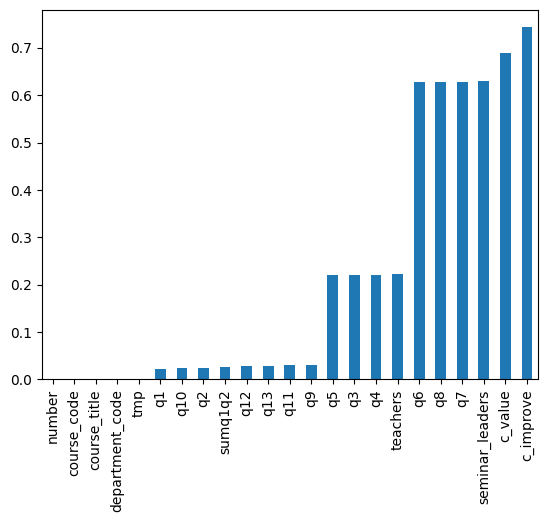

In [84]:
(df.isnull().sum()/df.shape[0]).sort_values().plot.bar()

<Axes: >

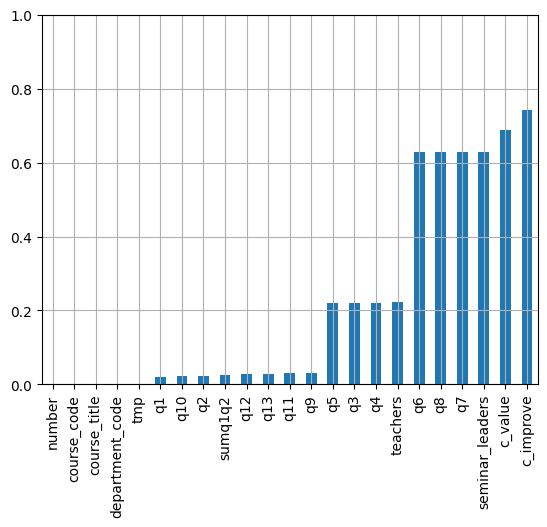

In [86]:
(df.isnull().sum()/df.shape[0]).sort_values().plot.bar(ylim=(0,1),grid=True)

## Data ex

https://web.archive.org/web/20180506061559/http://lisp.vse.cz/pkdd99/Challenge/chall.htm

In [87]:
import os

In [90]:
files = os.listdir('auxiliary/data_ex')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'auxiliary/data_ex'

In [89]:
files

NameError: name 'files' is not defined

In [14]:
data = {}
for file_name in files: 
    data[file_name.split('.')[0]] = pd.read_table('auxiliary/data_ex/' + file_name, sep = ';')
    

C:\Users\Martin Hronec\AppData\Local\Temp\ipykernel_22912\2341300206.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data[file_name.split('.')[0]] = pd.read_table('auxiliary/data_ex/' + file_name, sep = ';')


In [91]:
data['account']

NameError: name 'data' is not defined

## Matplotlib <a name="introduction"></a>

* "A picture is worth a thousand words."
    * more like "A picture is worth a few lines of code."
* development started in 2003 by John D. Hunter, a neurobiologist (inspired by MATLAB software)
* generating basic plots in *matplotlib* is simple, mastering the library can be little bit less pleseant (we skip this part)
* you can have as much control as you want, but you can also concede as much control as you want 
* [**gallery**](https://matplotlib.org/stable/gallery/index.html)
    * can get help to problems like "I want to make a figure that looks something I've seen somewhere." (hard to google)
* plotting consists of many layers, from general 'contour this 2D array' to very specific 'color this screen pixel'
    * key is allowing both levels to coexist in one package
* *matplotlib* has 2 interfaces:
    1. "state-machine environment" (based on MATLAB)
    2. a object-oriented interface
* this often creates confusion (multiple, conflicting, solutions on the web)
* another common confusion is the relationship of *Matplotlib, pyplot and pylab*
    * Matplotlib is the whole package
    * `matplotlib.pyplot` is a module in matplotlib
    * `pylab` is a a convenience module doing a bulk import of `pyplot` and `numpy`

* [anatomy of the plot](https://matplotlib.org/examples/showcase/anatomy.html) from matplotlib

<img src= "https://matplotlib.org/_images/anatomy.png" width= "600" height="400">

* the *figure* keeps track of all the child *Axes*, titles,legends, etc.
    * the figure can have any number of *Axes*
* *Axes* is 'a plot', i.e. the region of the image with the data space
    * given *Axes* object can only be in one Figure
    * *Axes* contains 2 (3 in case of 3D) *Axis* objects which take care of the data limits (conrolled via `set_xlim()` method)
    * each *Axes* has a title (`set_title()`), an x- and y-labels (`set_xlabel()`)
* *Artist* is anything you can see on the figure, e.g. text objects, Line2D objects, etc.

* `matplolib.pyplot` functions make some changes to a figure, e.g. create a figure, plot some lines, etc.
    * the plotting functions are directed to the current axes

* all of plotting functions expect `np.array` or `array-like` data objects (for majority of cases works out of the box)

In [ ]:
# increasing the size of the figure
plt.figure(figsize = (20,10))

In [ ]:
from time import sleep
for style in plt.style.available:
    plt.style.use(style)
    print(style)
    plt.figure(figsize=(5,2))
    plt.plot(np.sin(np.linspace(0,2*np.pi)))
    plt.show()
    sleep(1)

In [ ]:
plt.style.use('ggplot')
# minimum example of pyplot
x = np.linspace(0, 2, 100)

# we can also specify only "y" and use default x-axis: plt.plot(x, label='linear')
plt.plot(x, x, label='linear',  linewidth=2.0)
plt.plot(x, x**2, label='quadratic')
plt.plot(x, np.sqrt(x),'k^:',label='sqrt')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Basic plots")

plt.legend(loc = 'best');

* for multiple subplots: `fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))`
* call `plt.subplot()` and specify three numbers:
    * number of rows
    * number of columns
    * subplot number you want to activate.
* if subplots are too squished `plt.tight_layout()`

In [ ]:
for i in range (1, 5):
    plt.subplot(2, 2, i)
    plt.text(0.5,0.5, str((2, 2, i)), ha='center', fontsize = 10) #again, just a plot
    plt.tight_layout() 
    plt.grid(True) # add the grid

In [ ]:
# for multiple figures and axes 
def f(x):
    return np.cos(2*np.pi*x)

x1 = np.arange(0.0, 5.0, 0.1)
x2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1) # optional, since figure(1) will be created by default
plt.subplot(211)
plt.plot(x1, f(x1), 'bo', x2, f(x2), 'k')

plt.subplot(212)
plt.plot(x2, np.tan(2*np.pi*x2), 'r--')

In [ ]:
mu, sigma, n = 100, 15, 10000
x = np.random.normal(mu, sigma, n)

# the histogram of the data
plt.hist(x, bins = 50, density= True, facecolor='g')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram of X')

# meaningful text
plt.text(60, .025, f'$\mu={mu},\ \sigma={sigma}$')
# tail events text
plt.text(40, .00025, f"I've seen better times.")

plt.grid(True)

## Saving plots

In [ ]:
ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
plt.annotate("'go home, you are drunk'-arrow'", xy=(4.5, -1.7), xytext=(0.3, 1.7),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.ylim(-2, 2)

# actually saving
plt.savefig('auxiliary/go_home_you_drunk.png')